### Analysis of calculated similarity

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Assessing best similarity threshold:

In [8]:
# engnews = pd.read_parquet('../../eng-dataset/all-eng-news-texts.parquet').reset_index().rename(columns={'index': 'EngText Index', 'text': 'EngText'}).drop(['source'], axis=1)
# estnews = pd.read_parquet('../../est-dataset/all-est-news.parquet')[['EstText Index', 'Text']].rename(columns={'Text': 'EstText'})

# simsample = pd.read_parquet('similarity-sample.parquet')

# estjoin = pd.merge(simsample, estnews, on='EstText Index')
# engjoin = pd.merge(estjoin, engnews, on='EngText Index')

# simsampletexts = engjoin.sort_values(by='Similarity Bin')
# simsampletexts.to_csv('similarity-sample.csv', index=False)

Annotation of samples:

In [9]:
simsampleannt = pd.read_csv('similarity-sample-annotated.csv')[['Similarity Bin', 'Similarity']]

In [10]:
# plt.hist(simsampleannt['Similarity Bin'], bins=10, edgecolor='white');

Annotation results:

In [11]:
simdistr = pd.read_parquet('similarity-distr.parquet')
thresholds = [round(i * 0.05, 2) for i in range(21)]
results = []

for threshold in thresholds:
    article_count = simdistr[simdistr['Cosine Similarity Score'] >= threshold].shape[0]
    results.append({'Cosine Similarity Score': threshold*10, 'Article Count': article_count})

article_count_df = pd.DataFrame(results)

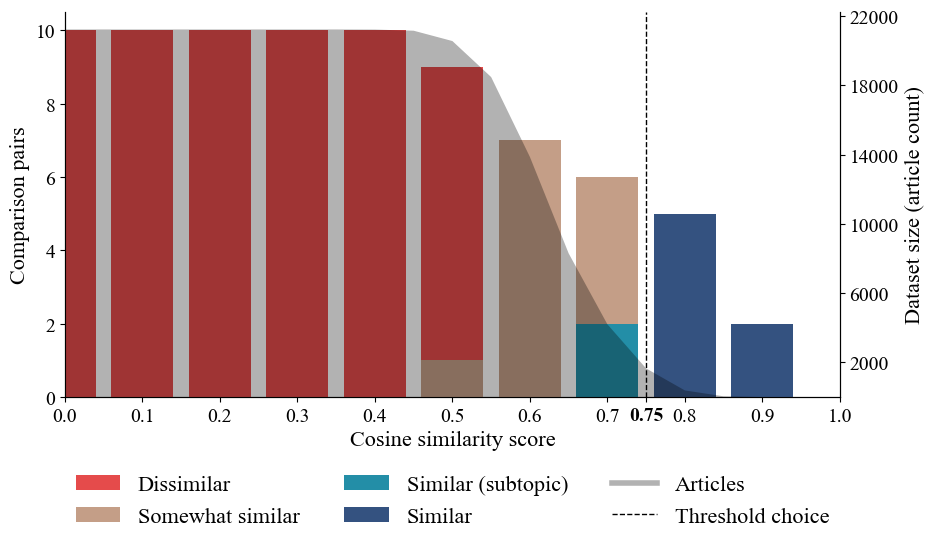

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.lines import Line2D

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
font = 14

plt.figure(figsize=(10, 5))
colors = ['#FF3131', '#ce9c7d', '#0d9cbd', '#284F8C']

hue_order = ['Dissimilar', 'Somewhat similar', 'Similar (Subtopic)', 'Similar']

article_count_data = np.array(article_count_df['Article Count'].tolist())
x_article_count = np.array(article_count_df['Cosine Similarity Score'].tolist())

ax1 = plt.gca()

ax1.set_ylabel('Comparison pairs', fontsize=font+2)
ax1.set_xlabel('Cosine similarity score', fontsize=font+2)

ax2 = ax1.twinx()
ax2.fill_between(x_article_count, article_count_data, alpha=0.3, color='black', zorder=0, edgecolor='none', label='Dataset Size In Articles')
ax2.set_ylim(0, max(article_count_data) + 1000)
ax2.set_yticks([2000, 6000, 10000, 14000, 18000, 22000])
ax2.set_ylabel('Dataset size (article count)', fontsize=font+2)
ax2.spines['top'].set_visible(False)

sns.countplot(ax=ax1, data=simsampleannt, x='Similarity Bin', hue='Similarity',
              order=simsampleannt['Similarity Bin'].unique(), palette=colors, hue_order=hue_order, dodge=False, zorder=5)

plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 7.5],
           labels=[f'{i/10:.1f}' for i in range(11)] + ['0.75'])

for tick in ax1.get_xticklabels():
    if tick.get_text() == '0.75':
        tick.set_fontweight('bold')

handles, labels = ax1.get_legend_handles_labels()
handles.append(plt.Line2D([0], [0], color='black', alpha=0.3, lw=4))
labels.append('Articles')

handles.append(Line2D([0], [1], color='black', linestyle='--', lw=1))
labels.append('Threshold Choice')

new_labels = ['Dissimilar', 'Somewhat similar', 'Similar (subtopic)', 'Similar', 'Articles', 'Threshold choice']
new_handles = [handles[i] for i in range(len(new_labels))]

ax1.legend(new_handles, new_labels, title='', frameon=False, loc='upper center', bbox_to_anchor=(0.5, -0.15), fontsize=font + 2, ncol=3)

sns.despine(ax=ax1, top=True)
ax1.spines['right'].set_visible(True)

plt.axvline(x=7.5, color='black', linestyle='--', linewidth=1, zorder=3)

ax1.set_xlim(0, len(simsampleannt['Similarity Bin'].unique()))

plt.savefig('../thresholdchoice.png', format='png')
plt.savefig('../thresholdchoice.svg', format='svg')

plt.show()

In [1]:
# simdistr = pd.read_parquet('similarity-distr.parquet')

# threshold = 0.75

# bins = [i * 0.05 for i in range(21)]
# counts, bin_edges, patches = plt.hist(simdistr['Cosine Similarity Score'], bins=bins, edgecolor='white')

# plt.axvline(x=threshold, color='red', linestyle='--', linewidth=2)

# plt.xlabel('Cosine Similarity Score')
# plt.ylabel('Frequency')
# plt.title('Histogram of Cosine Similarity Score')

# for count, edge in zip(counts, bin_edges):
#     plt.text(edge, count, f'{int(count)}', fontsize=9, va='bottom')

# plt.show()